## Estadística e Inferencia II - 2do cuatrimestre 2025
### Escuela de Ciencia y Tecnología - Universidad Nacional de San Martín
#### Javier Spina - javierspina@gmail.com | jaspina@estudiantes.unsam.edu.ar

---

## Trabajo Práctico Integrador - Parte 1
# Análisis Bayesiano del Dataset Iris

Este notebook cubre las consignas especificadas en `consignas/TP_integrador_EeI_II__parte_1.pdf`

---

### Parte 1 - Análisis exploratorio del dataset IRIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

sns.set_theme(style='white', palette='Set1')

In [2]:
iris = load_iris(as_frame=True).frame
iris['species'] = iris['target'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})
features = [c for c in iris.columns if c not in['target', 'species']]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
iris.loc[:, iris.columns != "target"].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


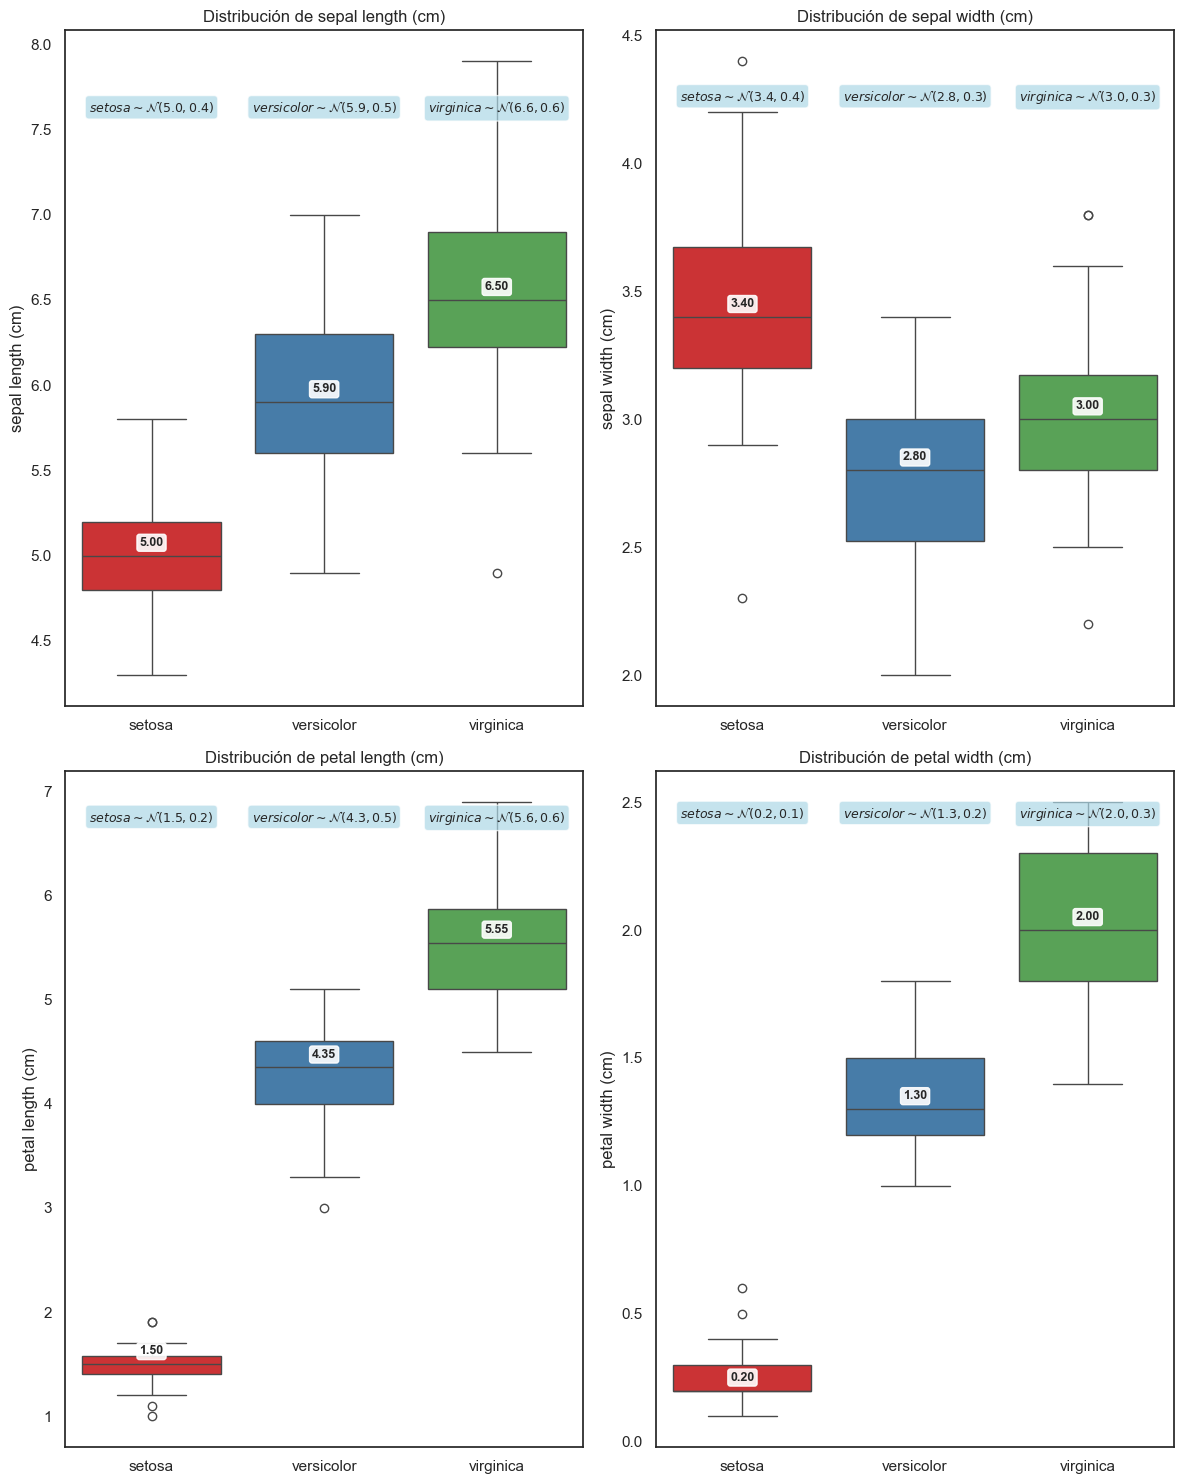

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 15))

for i, f in enumerate(features):
    ax = sns.boxplot(data=iris, y=f, x="species", hue="species", ax=axs[i//2, i%2])
    ax.set_xlabel("")

    for j, especie in enumerate(iris.species.unique()):
        data_especie = iris[iris['species'] == especie][f]
        media = data_especie.mean()
        desvio = data_especie.std()
        mediana = data_especie.median()

        # Usar annotate con offset para mejor posicionamiento
        ax.annotate(
            f"{mediana:.2f}",
            xy=(j, mediana),
            xytext=(0, 5),  # 5 puntos arriba de la mediana
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9),
        )

        # Agregar leyenda en formato LaTeX
        leyenda = f"${especie} \\sim \\mathcal{{N}}({media:.1f}, {desvio:.1f})$"
        
        # Posicionar la leyenda arriba de cada boxplot
        ax.text(j, ax.get_ylim()[1] * 0.95, leyenda,  # 95% del límite superior
                ha='center', va='top', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    
    ax.set_title(f'Distribución de {f}')

plt.tight_layout()
plt.show()

In [5]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

El dataset `iris` tiene 150 observaciones, 4 features y un target. Las 4 features son numéricas, son las medidas del sépalo y del pétalo, en ancho y longitud de ambas. El target es el nombre de la variedad, osea es categórica. En la siguiente tabla un breve resumen

<style>
td, th {
   border: none!important;
}
</style>

Nombre | Es target? | Tipo | Rango 
-- | -- | -- | -- 
`sepal length (cm)` | no | `float` | $\in [4.3, 7.9]$
`sepal width (cm)` | no | `float` | $\in [2.0, 4.4]$
`petal length (cm)` | no | `float` | $\in [1.0, 6.9]$
`petal width (cm)` | no | `float` | $\in [0.1, 2.5]$
`species` | si | `object` | $\in [\text{setosa}, \text{versicolor}, \text{virginica}]$

**Variables numéricas**

Feature | Rango | Media | Mediana | Desvío
-- | -- | -- | -- | --
`sepal length (cm)` | $\in [4.3, 7.9]$ | $5.84$ | $5.80$ | $0.83$
`sepal width (cm)` | $\in [2.0, 4.4]$ | $3.06$ | $3.00$ | $0.44$
`petal length (cm)` | $\in [1.0, 6.9]$ | $3.76$ | $4.35$ | $1.76$
`petal width (cm)` | $\in [0.1, 2.5]$ | $1.20$ | $1.30$ | $0.76$

**Variable categórica (target)**
Variable | Valor | Frecuencia
-- | -- | -- 
`species` | $\text{setosa}$ | $50$ 
`species` | $\text{versicolor}$ | $50$ 
`species` | $\text{virginica}$ | $50$ 

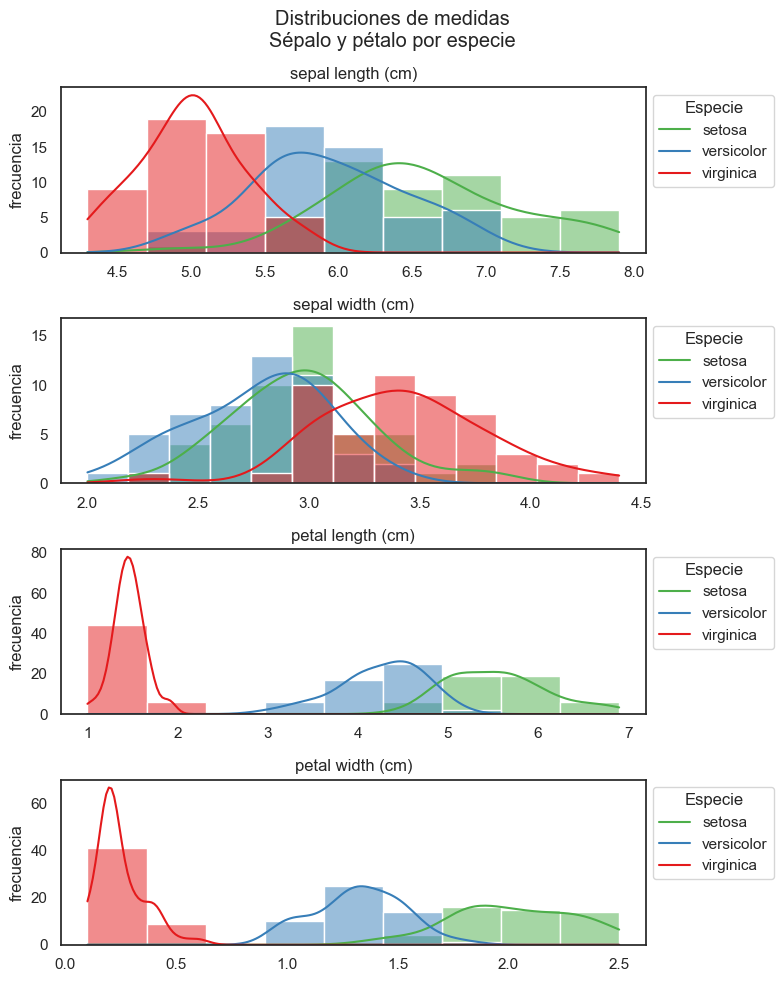

In [6]:
## Visualización univariada

xlims = [iris.min(numeric_only=True).min(), iris.max(numeric_only=True).max()]

fig, axs = plt.subplots(len(features), 1, figsize=(8, 10))

for i, f in enumerate(features):
    sns.histplot(
        data=iris,
        x=f,
        ax=axs[i],
        hue='species',
        kde=True
    ).legend(iris.species.unique(), title="Especie")
    axs[i].set_title(f)
    axs[i].set_ylabel("frecuencia")
    axs[i].set_xlabel("")
    sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))

plt.suptitle("Distribuciones de medidas\nSépalo y pétalo por especie")
plt.tight_layout()
plt.show()

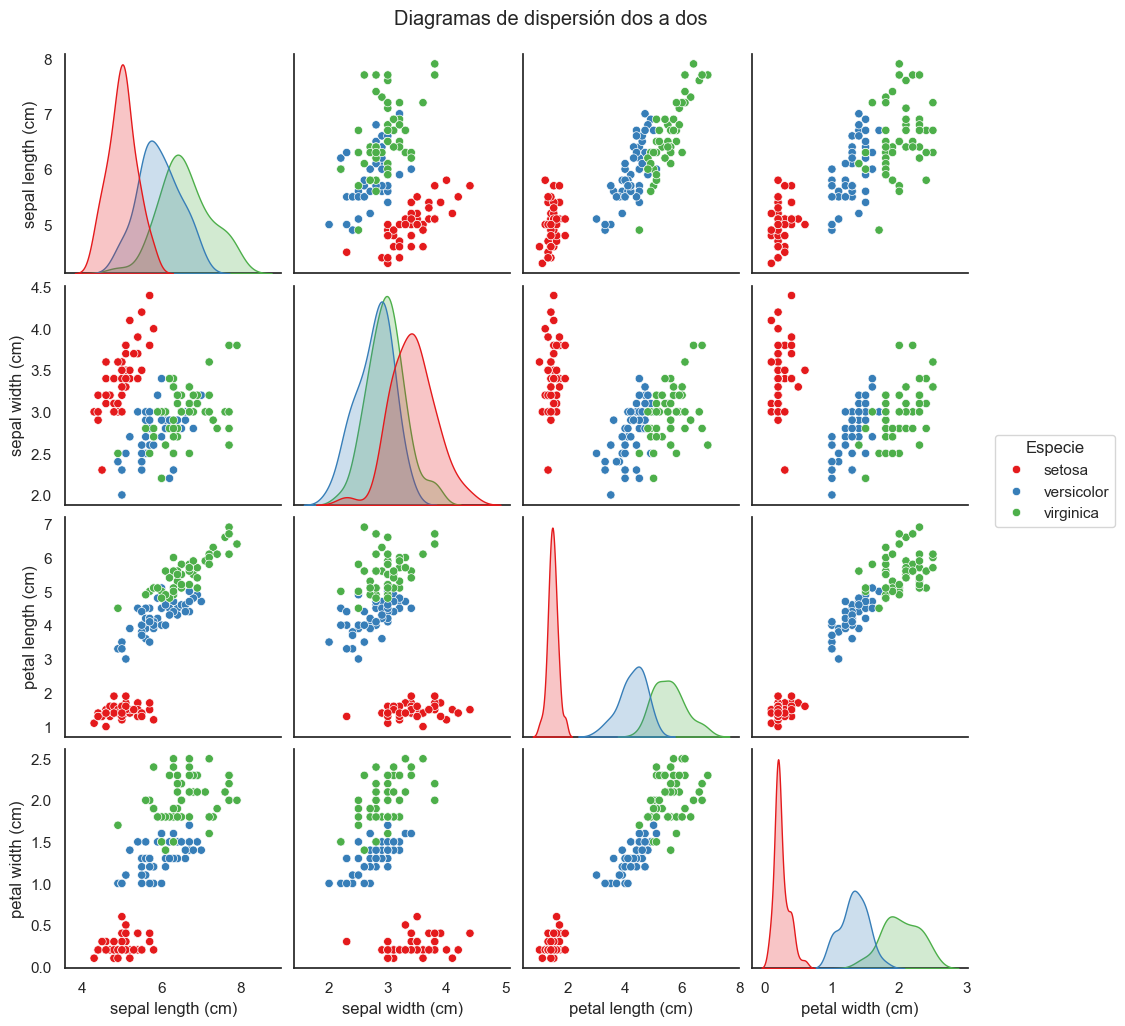

In [7]:
## Visualización bivariada

ax = sns.pairplot(iris.loc[:, iris.columns != "target"], hue="species")
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.95, 0.5),
    title="Especie",
    frameon=True
)
plt.suptitle("Diagramas de dispersión dos a dos", y=1.025)
plt.tight_layout
plt.show()

### Análisis preliminar
- La especie $\text{setosa}$ parece estar mejor diferenciada de las otras dos
- En primer lugar `sepal width`, y en segundo `sepal length` no nos separan tan bien a las especies como si lo hacen `petal length` y `petal width`. Los modelos deben tener al menos una de las medidas de los pétalos como dato.
- La relación más lineal es $\text{petal length}(\text{petal width})$